In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
banco = pd.read_csv('C:\\Users\\Usuario\\Desktop\\Cursos\\CoderHouse\\Data Science I Fundamentos para la Ciencia de Datos\\Datasets\\bank-full.csv', sep=';')
banco.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
banco.info()    # Analizar el type de los campos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
banco.shape                    #  Analizamos cantidad de filas y columnas

(45211, 17)

In [7]:
df=banco
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
# Análisis de valores nulos

nulos_por_columna = banco.isnull().sum()
print(nulos_por_columna)


# En el análisis de valores nulos, no se encontró valores nulos. 


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [9]:
# Análisis de valores "unknown"
unknown_por_columna = (banco == 'unknown').sum()
print(unknown_por_columna)

# Esto indica que algunas columnas tienen un número significativo de valores "unknown":
# job: 288 valores "unknown"
# education: 1857 valores "unknown"
# contact: 13020 valores "unknown"
# poutcome: 36959 valores "unknown"

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [10]:
# Proporción de valores "unknown" por columna -------> buscando terminar el 
proporcion_unknown = (banco == 'unknown').mean()
print(proporcion_unknown)

age          0.000000
job          0.006370
marital      0.000000
education    0.041074
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.287983
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.817478
y            0.000000
dtype: float64


In [11]:
# Imputar valores "unknown" con la moda
for column in ['job', 'education']:
    moda = banco[column].mode()[0]
    banco[column] = banco[column].replace('unknown', moda)

In [12]:
# Verificamos nuevamente 
proporcion_unknown = (banco == 'unknown').mean()
print(proporcion_unknown)

age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.287983
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.817478
y            0.000000
dtype: float64


In [13]:
# Evaluar la columna contact y poutcome
# Dado que contact y poutcome tienen proporciones de 28.80% y 81.75% de valores "unknown" respectivamente.

# Imputar valores "unknown" con la moda para 'contact'
moda_contact = banco['contact'].mode()[0]
banco['contact'] = banco['contact'].replace('unknown', moda_contact)

In [14]:
# Verificamos nuevamente 
proporcion_unknown = (banco == 'unknown').mean()
print(proporcion_unknown)

age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.817478
y            0.000000
dtype: float64


In [15]:
# Eliminamos la columna poutcome
banco = banco.drop(columns=['poutcome'])

# Verificación post-eliminación
print(banco.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

    contact  day month  duration  campaign  pdays  previous   y  
0  cellular    5   may       261         1     -1         0  no  
1  cellular    5   may       151         1     -1         0  no  
2  cellular    5   may        76         1     -1         0  no  
3  cellular    5   may        92         1     -1         0  no  
4  cellular    5   may       198         1     -1         0  no  


### **¿Existe alguna relación entre edad y saldo promedio de los clientes?**

Hipótesis:
"Los clientes de mayor edad tienden a tener un saldo promedio más alto en sus cuentas bancarias."

In [16]:
# Agrupar por edad para poder graficar

salarios_por_edad = banco.groupby('age').agg(
    Cant=('age', 'size'),  # Contar el número de registros
    Cantidad_Plata=('balance', 'sum')  # Sumar los valores de 'balance'
).reset_index()

# Calcular el salario promedio y agregarlo como una nueva columna
salarios_por_edad['Salario_Promedio'] = round(salarios_por_edad['Cantidad_Plata'] / salarios_por_edad['Cant'], 2)

# Ordenar por 'Cantidad_Plata' en orden descendente
salarios_por_edad = salarios_por_edad.sort_values(by='Cantidad_Plata', ascending=False)

print(salarios_por_edad)

    age  Cant  Cantidad_Plata  Salario_Promedio
14   32  2085         2685405           1287.96
13   31  1996         2382396           1193.59
15   33  1972         2381483           1207.65
16   34  1930         2359311           1222.44
18   36  1806         2165230           1198.91
..  ...   ...             ...               ...
73   92     2            1550            775.00
74   93     2            1550            775.00
75   94     1            1234           1234.00
70   88     2            1081            540.50
72   90     2             713            356.50

[77 rows x 4 columns]


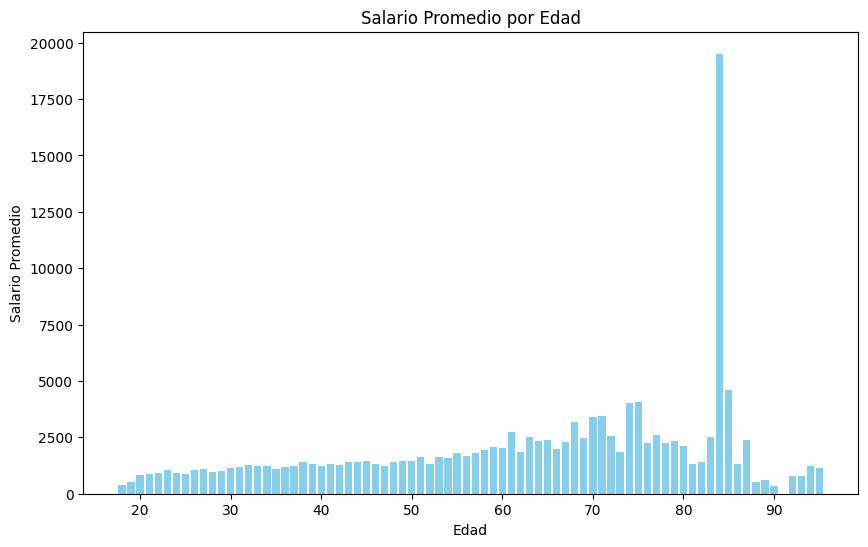

In [17]:
# Gráfico de barras para salarios por edad
plt.figure(figsize=(10, 6))
plt.bar(salarios_por_edad['age'], salarios_por_edad['Salario_Promedio'], color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Edad')
plt.show()

### Observaciones del Gráfico

Podemos observar una tendencia general de aumento en el salario promedio a medida que aumenta la edad de los clientes. Esto sugiere que los clientes de mayor edad tienden a tener saldos promedio más altos en sus cuentas bancarias. 

Además, se puede identificar un valor atípico (outlier) a la edad de 84 años, donde el salario promedio es significativamente diferente del resto de los datos.

In [18]:
#Identificar los registros de 84 años
salario_edad_84 = salarios_por_edad.loc[salarios_por_edad['age'] == 84]
print(salario_edad_84)

    age  Cant  Cantidad_Plata  Salario_Promedio
66   84     9          175600          19511.11


In [19]:
# Filtrar todos los registros donde la edad es 84 
registros_edad_84 = banco[banco['age'] == 84]
print(registros_edad_84)

       age           job   marital  education default  balance housing loan  \
41290   84       retired   married    primary      no     1702      no   no   
41654   84  entrepreneur   married  secondary      no        0      no   no   
42074   84       retired   married    primary      no     1791      no   no   
42558   84       retired   married  secondary      no    81204      no   no   
42932   84       retired  divorced    primary      no     2619      no   no   
43393   84       retired   married  secondary      no    81204      no   no   
43745   84       retired  divorced    primary      no      639      no   no   
44701   84       retired  divorced    primary      no     1680      no   no   
44746   84       retired   married   tertiary      no     4761      no   no   

         contact  day month  duration  campaign  pdays  previous    y  
41290  telephone   26   aug       185         1     -1         0   no  
41654  telephone   30   sep       992         2     -1         0 

Esta información nos ayuda a determinar si el valor atípico a la edad de 84 es un dato erróneo o simplemente una anomalía natural en los datos. 

En este caso, parece que no es un error, sino una característica del grupo de edad analizado.

### **¿Existe una edad predominante entre los clientes del banco?**

Hipótesis:
"La mayoría de los clientes del banco se concentran en un rango de edad específico"

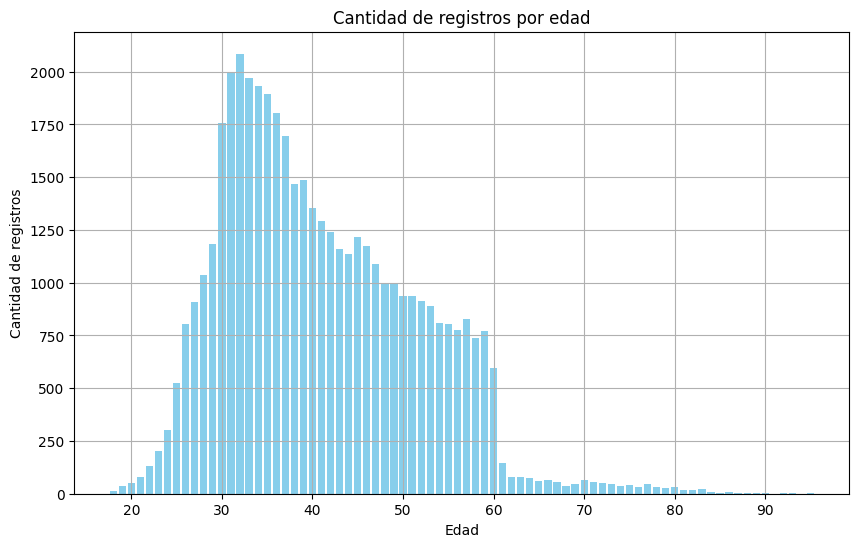

In [20]:
# Gráfico de barras para analizar distribución por edad

plt.figure(figsize=(10, 6))
plt.bar(salarios_por_edad['age'], salarios_por_edad['Cant'], color='skyblue')
plt.xlabel('Edad')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros por edad')
plt.grid(True)
plt.show()

El gráfico muestra la distribución de la cantidad de registros por edad entre los clientes del banco. 

Se observa claramente que la mayoría de los registros se concentran en el rango de edades entre 30 y 40 años. 

Esto indica que este grupo de edad es significativamente representativo entre los clientes del banco, posiblemente debido a su actividad económica y necesidades financieras.

### **¿Cuál es la distribución de los clientes del banco según su ocupación?**

Hipótesis: "Existen ciertas ocupaciones que tienen una mayor representación entre los clientes del banco, reflejado en una mayor cantidad de registros por trabajo."

In [21]:
# Agrupar por trabajo 
Salarios_por_trabajo = banco.groupby('job').agg(
    Cantidad_de_personas=('job', 'size'),  # Contar el número de registros
    Cantidad_Plata=('balance', 'sum')  # Sumar los valores 
).reset_index()

# Salario promedio
Salarios_por_trabajo['Salario_Promedio'] = round(Salarios_por_trabajo['Cantidad_Plata'] / Salarios_por_trabajo['Cantidad_de_personas'], 2)

# Ordenar por 'Cantidad_Plata' 
Salarios_por_trabajo = Salarios_por_trabajo.sort_values(by='Cantidad_Plata', ascending=False)

print(Salarios_por_trabajo)

              job  Cantidad_de_personas  Cantidad_Plata  Salario_Promedio
4      management                  9458        16680288           1763.62
1     blue-collar                 10020        11009580           1098.76
9      technician                  7597         9516246           1252.63
0          admin.                  5171         5873423           1135.84
5         retired                  2264         4492263           1984.22
7        services                  4154         4141904            997.09
6   self-employed                  1579         2602146           1647.97
2    entrepreneur                  1487         2262426           1521.47
10     unemployed                  1303         1982835           1521.75
3       housemaid                  1240         1726570           1392.40
8         student                   938         1302001           1388.06


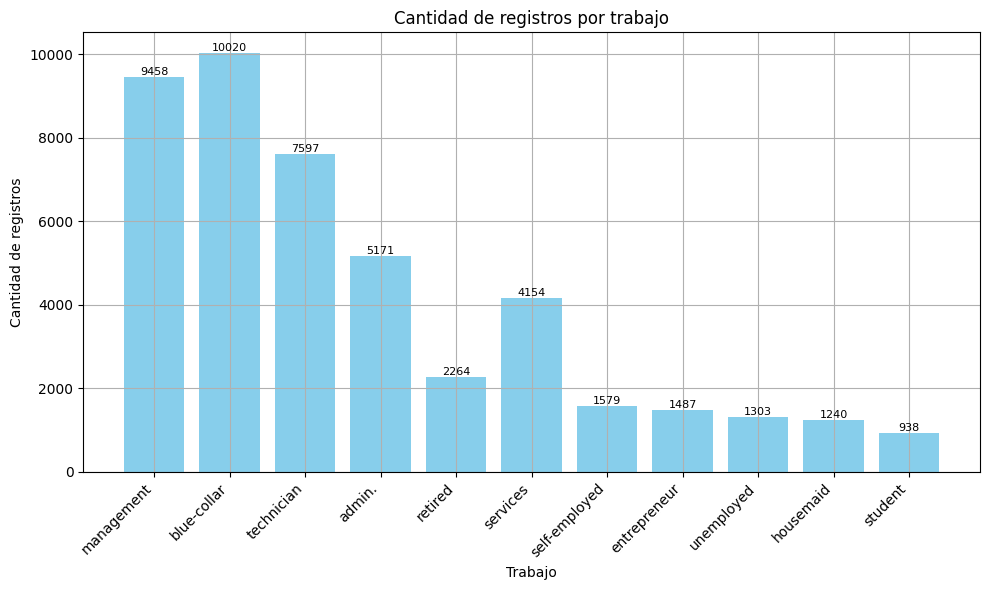

In [22]:
# Gráfico de barras para ver la cantidad de registros por trabajo
plt.figure(figsize=(10, 6))
bars = plt.bar(Salarios_por_trabajo['job'], Salarios_por_trabajo['Cantidad_de_personas'], color='skyblue')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros por trabajo')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Agregar números en cada barra   ----> Solamente se pueden poner etiquetas con el for?

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

### Distribución por Trabajo

Los datos muestran que la mayoría de los clientes del banco se distribuyen principalmente en trabajos como management, blue-collar (trabajadores manuales) y technician. Estas tres ocupaciones representan la mayor cantidad de registros.

### Saldo Acumulado por Trabajo

- **Management**: Es el trabajo con el mayor saldo acumulado en las cuentas de los clientes, con un total de $16,680,288.
- **Blue-collar**: A pesar de tener más clientes que management, su saldo acumulado es considerablemente menor, con $11,009,580.
- **Technician**: Ocupa el tercer lugar en saldo acumulado, con $9,516,246.



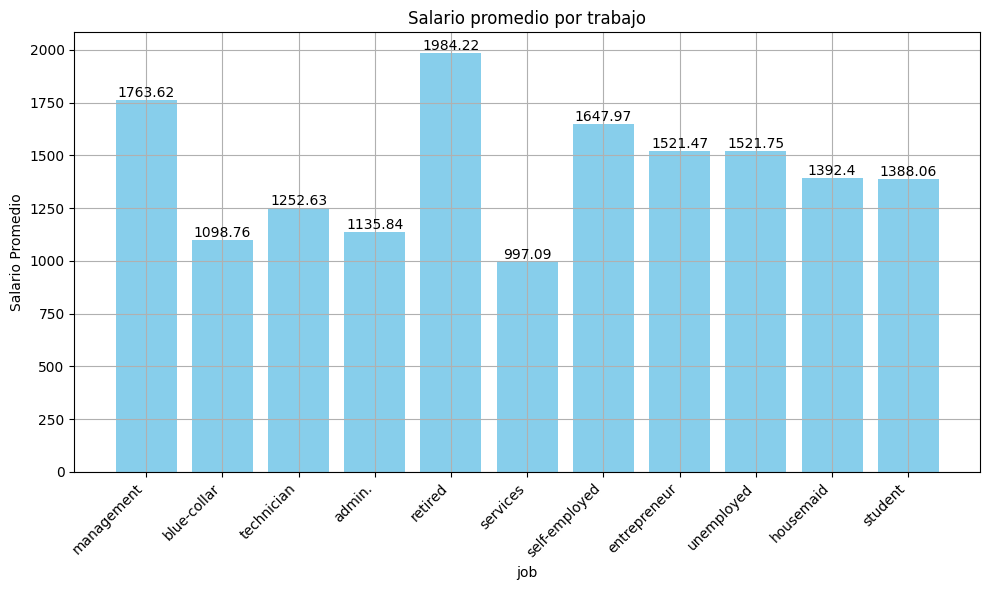

In [23]:
# Gráfico de barras para el salario promedio por trabajo

plt.figure(figsize=(10, 6))  
bars = plt.bar(Salarios_por_trabajo['job'], Salarios_por_trabajo['Salario_Promedio'], color='skyblue')  
plt.xlabel('job')  # titulo eje x
plt.ylabel('Salario Promedio')  # titulo eje y
plt.title('Salario promedio por trabajo')  # Título del gráfico
plt.xticks(rotation=45, ha='right')  # Mejorar la legibilidad
plt.grid(True)  # Muestra la cuadrícula en el gráfico ---> mejor visualmente
plt.tight_layout()  # Ajusta el diseño 

# Agregar valores encima de las barras

for bar in bars:
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')  # Agrega el valor encima de la barra

plt.show()  # Muestra el gráfico

### Salario Promedio por Trabajo

- **Retired**: Los clientes jubilados tienen el salario promedio más alto de $1,984.22.
- **Management**: Aunque tienen menos clientes que blue-collar, tienen un salario promedio de $1,763.62, el segundo más alto.
- **Self-employed**: Con un salario promedio de $1,647.97, ocupan el tercer lugar.

Estos insights sugieren que, aunque management tiene menos clientes en comparación con blue-collar, su saldo acumulado y salario promedio son significativamente más altos. Por otro lado, los jubilados, a pesar de ser menos en número, tienen un ingreso promedio más alto. Estos datos pueden ser útiles para diseñar estrategias de marketing y servicios bancarios dirigidos específicamente a estos segmentos ocupacionales.

In [24]:
bancoprueba = banco

**¿Existe alguna relación entre la edad de los clientes y el saldo en sus cuentas bancarias?** 

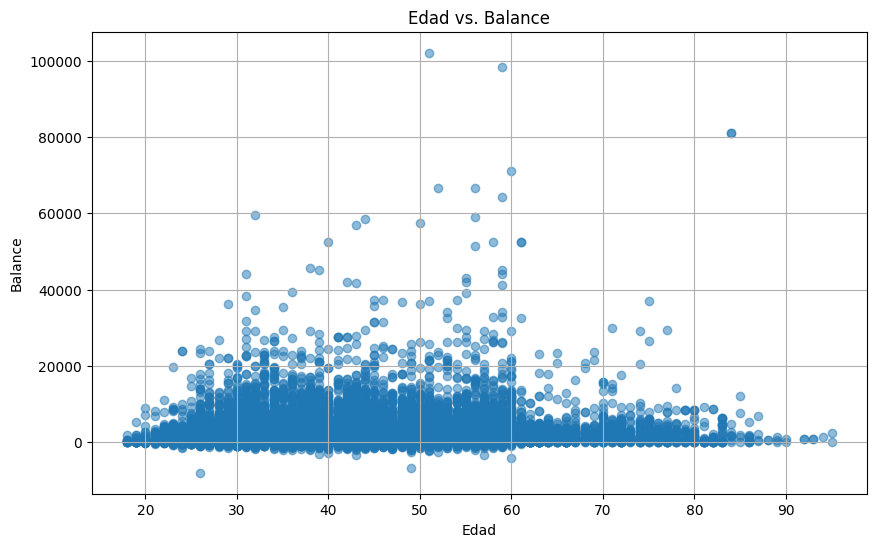

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(banco['age'], banco['balance'], alpha=0.5)
plt.title('Edad vs. Balance')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

**¿Existe alguna relación entre la edad de los clientes y la duración de los llamados?** 

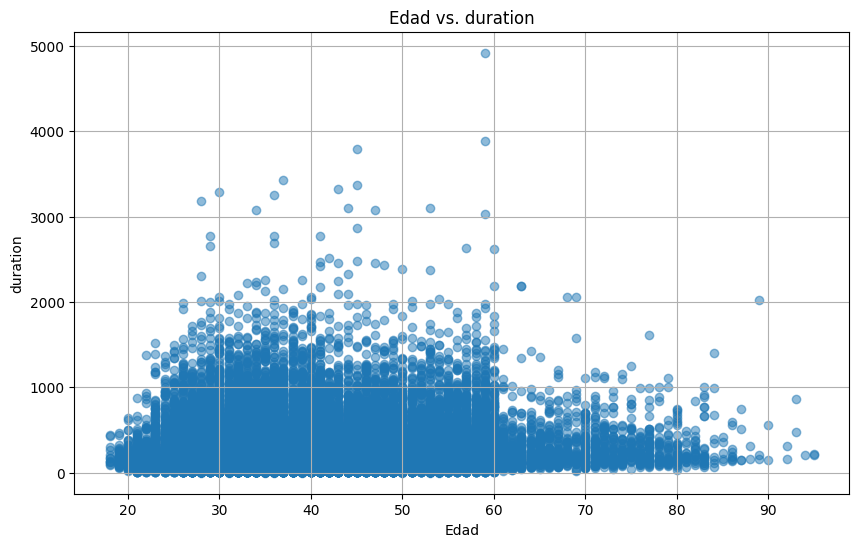

In [26]:
# Relación edad vs duración llamada

plt.figure(figsize=(10, 6))
plt.scatter(banco['age'], banco['duration'], alpha=0.5)
plt.title('Edad vs. duration')
plt.xlabel('Edad')
plt.ylabel('duration')
plt.grid(True)
plt.show()

**¿Existe alguna relación entre la campaña y la edad de los clientes?** 

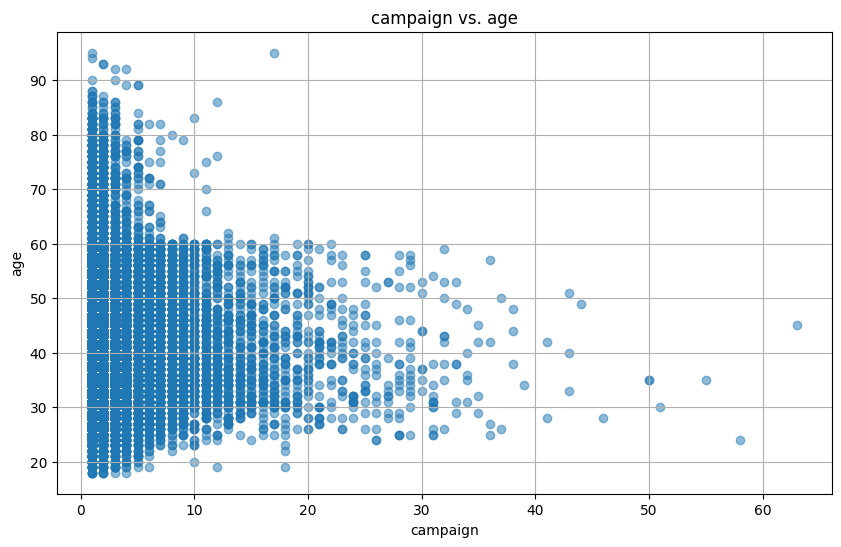

In [27]:
# Relación campaña vs edad

plt.figure(figsize=(10, 6))
plt.scatter(banco['campaign'], banco['age'], alpha=0.5)
plt.title('campaign vs. age')
plt.xlabel('campaign')
plt.ylabel('age')
plt.grid(True)
plt.show()

### **¿Existe alguna relación entre campaña y la duración de los llamados?** 

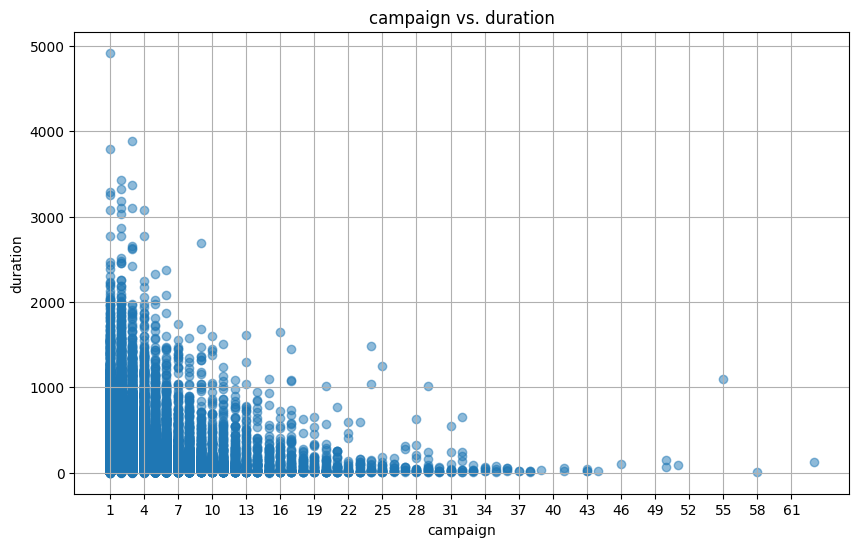

In [28]:
# Relación campaña vs duración ----> Campañas viejas duran más

plt.figure(figsize=(10, 6))
plt.scatter(banco['campaign'], banco['duration'], alpha=0.5)
plt.title('campaign vs. duration')
plt.xlabel('campaign')
plt.ylabel('duration')


plt.xticks(range(min(banco['campaign']), max(banco['campaign'])+1, 3))  # Valores se muestren cada 3 unidades


plt.grid(True)
plt.show()

**Relación entre la campaña y la duración de las llamadas:** Se observa claramente que las primeras campañas, específicamente las campañas 1 al 18, muestran una duración de llamadas significativamente mayor en comparación con las campañas posteriores.
Este patrón sugiere:

**Mayor compromiso inicial:** Las campañas más tempranas (1 al 18) lograron captar la atención de los clientes durante períodos de tiempo más largos. Esto podría indicar que las estrategias utilizadas al principio fueron más efectivas o que los mensajes iniciales fueron más relevantes para los clientes.

**Posible disminución con el tiempo:** Las campañas posteriores (después de la 18) parecen tener una duración de llamadas más corta, lo cual puede indicar una disminución en la efectividad de las campañas o un menor interés o respuesta por parte de los clientes a medida que avanzaban las campañas.

### **¿Cómo se distribuye el estado civil entre los clientes bancarios?**

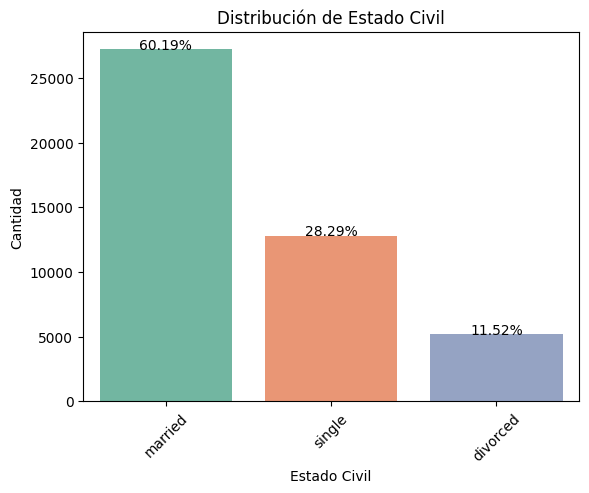

In [29]:
# Calcular los porcentajes
total = len(banco['marital'])
ax = sns.countplot(x='marital', data=banco, palette='Set2')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.title('Distribución de Estado Civil')
plt.xticks(rotation=45)

# Agregar porcentajes en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha="center")

plt.show()

**Predominancia de Casados:** El estado civil predominante es "casado" (married), representando aproximadamente el 60.19% de todos los clientes en el conjunto de datos del banco. Esto sugiere que la mayoría de los clientes tienen un estado civil de casados.

**Proporción de Solteros y Divorciados:** Los clientes solteros (single) representan alrededor del 28.29% y los divorciados (divorced) representan el 11.52%. Aunque los solteros constituyen una proporción significativa, es notable que los divorciados también son una minoría considerable en comparación con los casados y los solteros.

**Implicaciones para Estrategias de Mercado:** Esta distribución puede tener implicaciones importantes para estrategias de marketing y productos bancarios. Por ejemplo, podría indicar la necesidad de productos financieros que se adapten mejor a las necesidades y preferencias específicas de cada grupo marital, como cuentas conjuntas para parejas casadas o productos financieros diseñados para personas solteras que quizás estén más interesadas en inversiones individuales.

### **¿Cómo se relaciona el saldo bancario con la edad de los clientes según su estado marital?**

Hipótesis: Se espera que el saldo bancario varíe de manera significativa según la edad de los clientes y que esta variación pueda diferir entre los diferentes estados maritales.








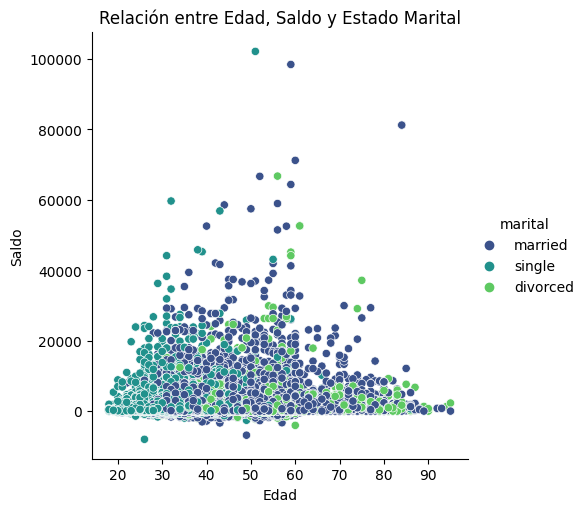

In [30]:
## Relación entre edad, balance y estado marital    ----> 

sns.relplot(x='age', y='balance', hue='marital', data=banco, palette='viridis', kind='scatter')
plt.xlabel('Edad')
plt.ylabel('Saldo')
plt.title('Relación entre Edad, Saldo y Estado Marital')
plt.show()

### **¿Cómo se distribuye el saldo bancario en relación con la edad de los clientes, diferenciado por ocupación?**

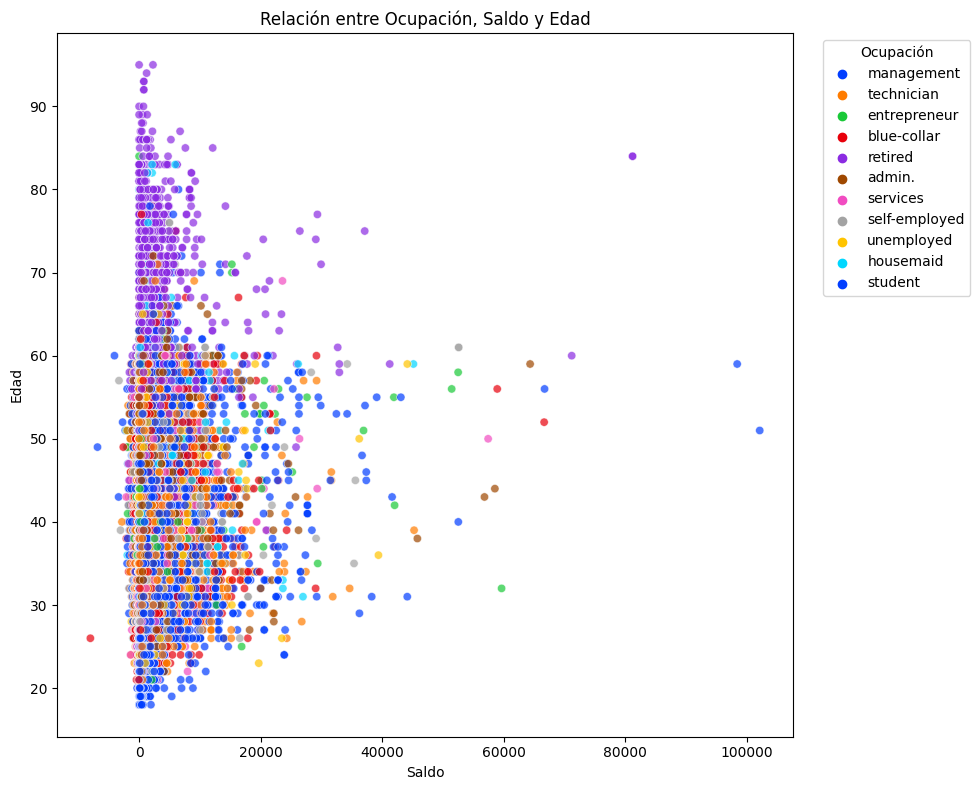

In [31]:
# Crear el gráfico de dispersión

plt.figure(figsize=(10, 8))
sns.scatterplot(x='balance', y='age', hue='job', data=banco, palette='bright', alpha=0.7)
plt.xlabel('Saldo')
plt.ylabel('Edad')
plt.title('Relación entre Ocupación, Saldo y Edad')
plt.legend(title='Ocupación', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

### **¿Existe alguna relación entre la duración de las llamadas y el saldo de las cuentas bancarias?**

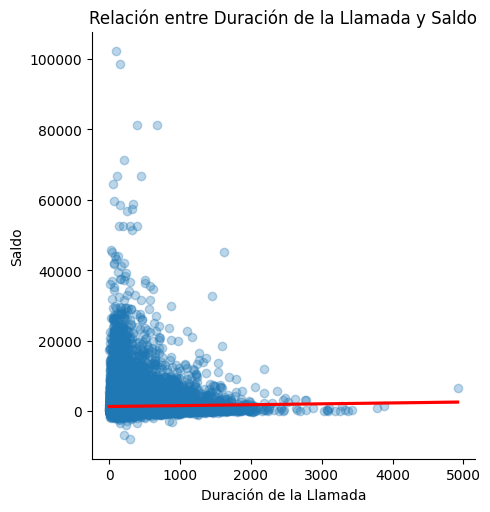

In [32]:
# Relación entre duración de la llamada y saldo ...

sns.lmplot(x='duration', y='balance', data=banco, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.xlabel('Duración de la Llamada')
plt.ylabel('Saldo')
plt.title('Relación entre Duración de la Llamada y Saldo')
plt.show()

### **¿Cuál es la distribución de la variable objetivo 'y' en el dataset?**

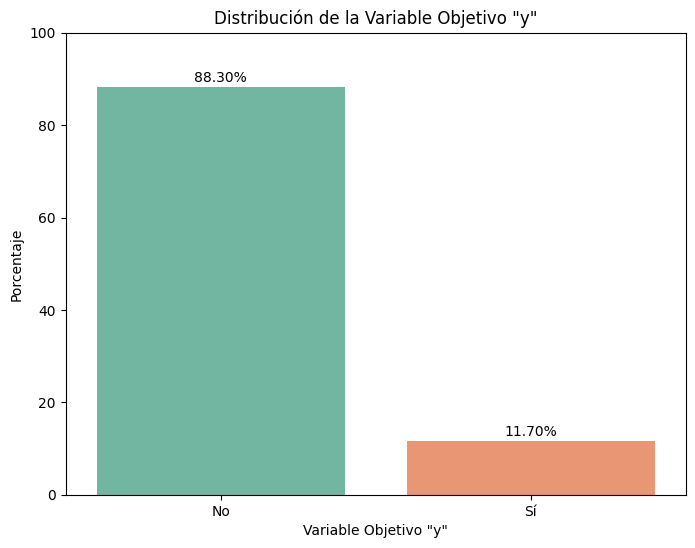

In [33]:
# Calcular la distribución de la variable y
distribucion_y = banco['y'].value_counts(normalize=True) * 100

# Graficar la distribución con porcentajes en las barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=distribucion_y.index, y=distribucion_y.values, palette='Set2')

# Agregar etiquetas de porcentaje en las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            '{:.2f}%'.format(height), ha='center')

plt.xlabel('Variable Objetivo "y"')
plt.ylabel('Porcentaje')
plt.title('Distribución de la Variable Objetivo "y"')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.ylim(0, 100) 
plt.show()

Se observa que el 88.30% de los casos corresponden a la categoría "No", mientras que el 11.70% corresponde a la categoría "Sí" de la variable objetivo "y". 

Esto sugiere que existe un desbalance considerable en los datos con respecto a la variable objetivo.

### **¿Exste relación entre estado civil y la variable Objetivo "y"?**

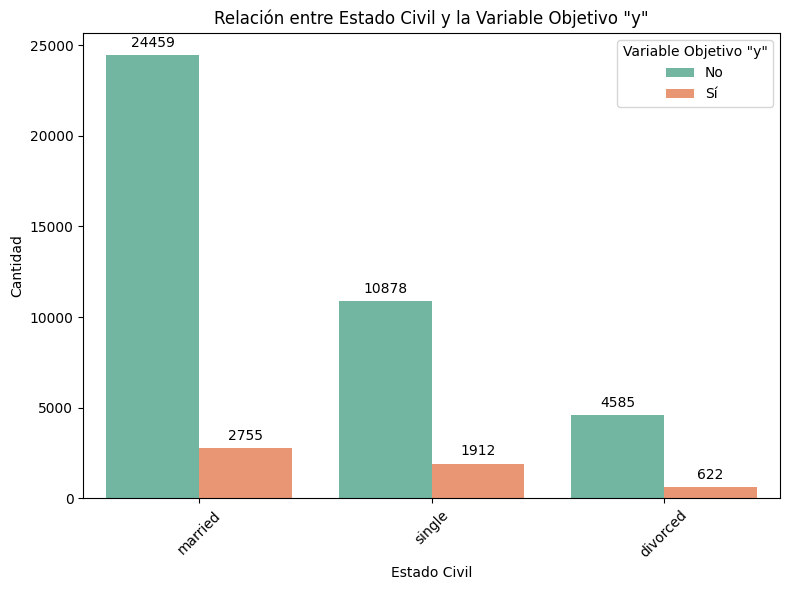

In [34]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='marital', hue='y', data=banco, palette='Set2')

# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.title('Relación entre Estado Civil y la Variable Objetivo "y"')
plt.xticks(rotation=45)
plt.legend(title='Variable Objetivo "y"', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

### **Relación entre Ocupación y la Variable Objetivo "y"**

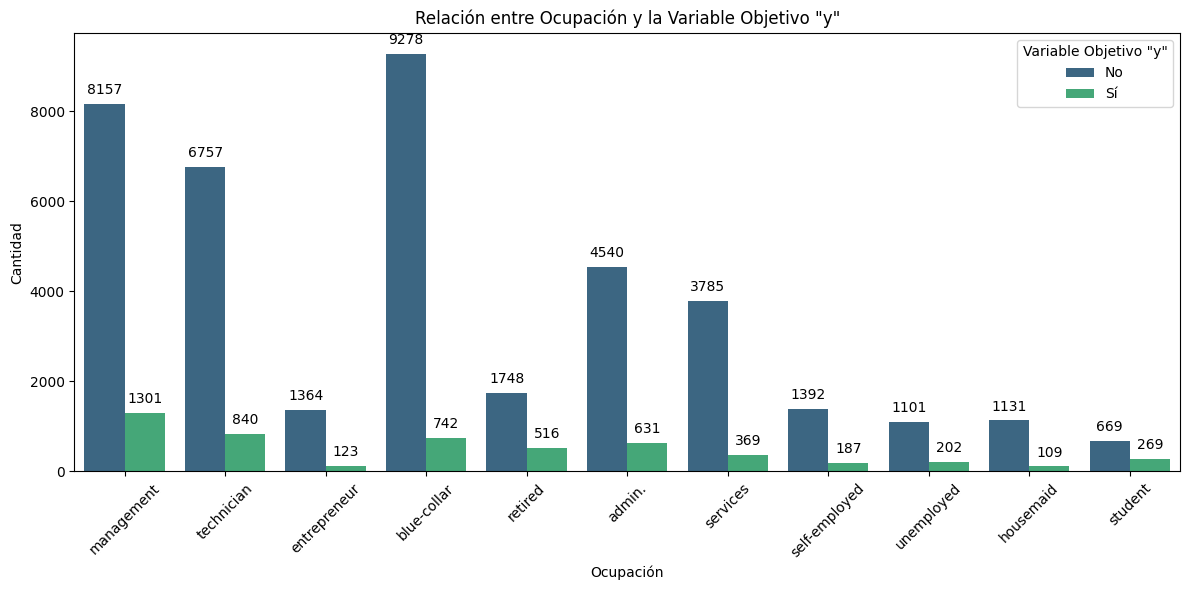

In [35]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='job', hue='y', data=banco, palette='viridis')

# Agregar etiquetas con la cantidad de datos en cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=10,
                color='black')

plt.xlabel('Ocupación')
plt.ylabel('Cantidad')
plt.title('Relación entre Ocupación y la Variable Objetivo "y"')
plt.xticks(rotation=45)
plt.legend(title='Variable Objetivo "y"', labels=['No', 'Sí'])
plt.tight_layout()
plt.show()

### **Relación entre Educación y la Variable Objetivo "y":**

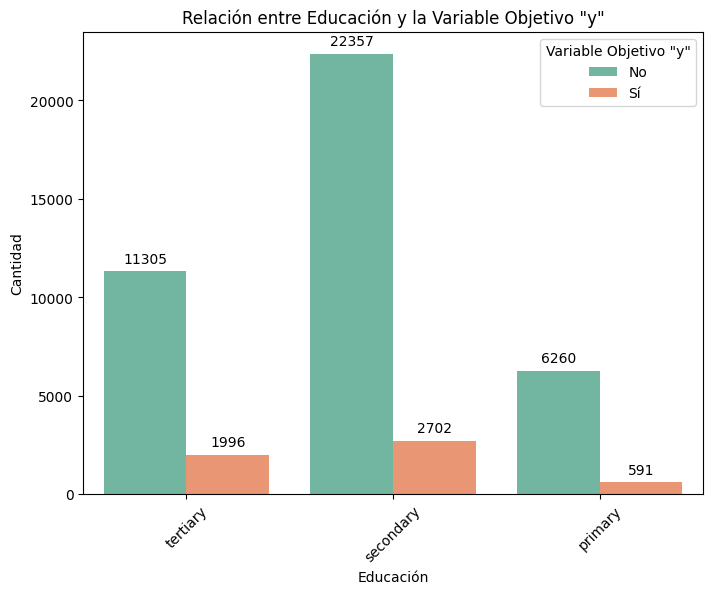

In [36]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='education', hue='y', data=banco, palette='Set2')

# Agregar etiquetas a cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('Educación')
plt.ylabel('Cantidad')
plt.title('Relación entre Educación y la Variable Objetivo "y"')
plt.xticks(rotation=45)
plt.legend(title='Variable Objetivo "y"', labels=['No', 'Sí'])
plt.show()

### **Relación entre Contacto y la Variable Objetivo "y"**

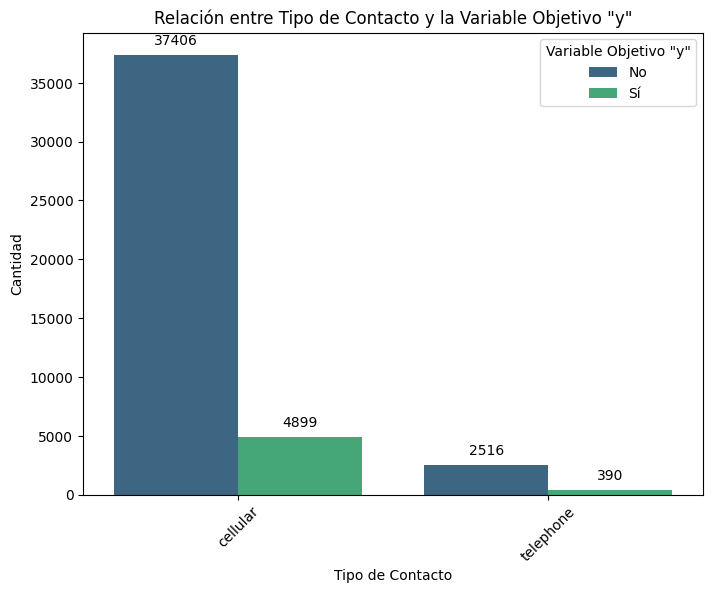

In [37]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='contact', hue='y', data=banco, palette='viridis')
plt.xlabel('Tipo de Contacto')
plt.ylabel('Cantidad')
plt.title('Relación entre Tipo de Contacto y la Variable Objetivo "y"')
plt.xticks(rotation=45)
plt.legend(title='Variable Objetivo "y"', labels=['No', 'Sí'])

# Agregar etiquetas de datos sin decimales
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

## *Método de feater selection*

In [38]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

data = pd.read_csv('C:\\Users\\Usuario\\Desktop\\Cursos\\CoderHouse\\Data Science I Fundamentos para la Ciencia de Datos\\Datasets\\bank-full.csv', sep=';')

# Separar las características y la variable objetivo
X = data.drop('y', axis=1)
y = data['y']

# Variables categóricas a numéricas
X = pd.get_dummies(X)

# Seleccionar características
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['duration', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_unknown', 'month_mar', 'month_oct', 'month_sep',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')


### **MODELO 1**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
print("Informe de clasificación:\n", class_report)

Precisión del modelo: 0.8998083161309348
Matriz de confusión:
 [[11678   288]
 [ 1071   527]]
Informe de clasificación:
               precision    recall  f1-score   support

          no       0.92      0.98      0.95     11966
         yes       0.65      0.33      0.44      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



### **Conclusión del Análisis**

En este proyecto, usé un modelo de regresión logística para ver si los clientes suscriben un depósito a plazo. Convertí los datos categóricos a numéricos y seleccioné las mejores características con SelectKBest.

**Características Importantes:** Elegí las 10 características más relevantes, lo que ayudó al modelo a enfocarse en lo más importante.

**Resultados del Modelo:**

**Precisión Total:** Logré una precisión del 89.98%, lo que significa que el modelo es bastante bueno para hacer predicciones correctas.

**Matriz de Confusión:** El modelo predijo bien cuando un cliente no suscribió, con muchos aciertos y pocos errores.

**Informe Detallado**:

**Clase "no":** La precisión fue del 92% y el recall del 98%, lo que muestra que el modelo es muy bueno para identificar a quienes no suscribieron.

**Clase "yes":** Aquí la precisión fue del 65% y el recall del 33%, indicando que es más difícil para el modelo encontrar a los clientes que sí suscriben.

**Reflexiones**:

El modelo tuvo problemas con la clase "yes" porque hay menos ejemplos de estos casos. Usar técnicas para equilibrar las clases podría ayudar.
El modelo es más confiable para saber quién no suscribió.
Este análisis es un buen comienzo y hay muchas oportunidades para mejorar el modelo, como ajustar parámetros o probar otros enfoques.